# RANDOM FOREST FOR CUSTOMER RATING PREDICTION

In [91]:
# importing libraries 
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, mean_squared_error

import statsmodels.formula.api as sm

from statsmodels.regression.linear_model import OLS

In [92]:
# importing the dataset
df=pd.read_csv("CustomerDataMockNew.csv", decimal = ',')
df_1=pd.read_csv("CampaignDataMock.csv",decimal=",")
df_2= pd.read_csv("SentimentFinal.csv",decimal=",")

In [93]:
df.head()

,Name,Email,Age,Months of subscription,Subscription,Premium,Profit/User,Usage,Flac Usage,Customer Type,State,Payment Method,Card Number,Created Year,Created Time,Customer Rating,Avatar,Phone Number,Current Occupation,Account creation Date
0,Ginnifer Domniney,gdomniney0@unicef.org,45,2018,Family Plan subscription,No,1484.507,Android,No,Artist,TX,mastercard,5.58E+15,2018,4:56,2.3,http://dummyimage.com/107x159.jpg/ff4444/ffffff,577-884-6621,Other,5/17/2019
1,Avis Schowenburg,aschowenburg1@shareasale.com,62,2018,Free users subscription,Yes,7617.625,MAC,No,Listner,NV,jcb,3.58E+15,2018,12:18,2.2,http://dummyimage.com/184x105.png/cc0000/ffffff,825-713-5097,Home maker,3/18/2019
2,Cly Isted,cisted2@istockphoto.com,22,2018,1 year subscription,Yes,6632.419,Windows,No,Listner,CA,jcb,3.54E+15,2019,11:33,4.1,http://dummyimage.com/114x248.bmp/cc0000/ffffff,282-273-4944,Home maker,8/28/2018
3,Abelard Behning,abehning3@goo.ne.jp,58,2018,6 month subscription,No,6616.582,Android,Yes,Listner,SC,switch,6.33E+17,2015,11:19,2.3,http://dummyimage.com/219x206.jpg/ff4444/ffffff,548-896-6274,Working Professional,11/28/2018
4,Dulcie De Beneditti,dde4@techcrunch.com,31,2018,3 month subscription,No,7236.021,Windows,Yes,Artist,TX,solo,6.33E+15,2018,9:38,3.5,http://dummyimage.com/201x151.bmp/dddddd/000000,764-630-5447,Unemployed,7/5/2018


In [94]:
df['Created Year'].unique()

array([2018, 2019, 2015, 2017, 2011, 2008, 2012, 2010, 2016, 2014, 2009],
      dtype=int64)

In [95]:
df_new=df[df['Created Year']>2017]
df_new.info

<bound method DataFrame.info of                       Name                           Email  Age  \
0        Ginnifer Domniney           gdomniney0@unicef.org   45   
1         Avis Schowenburg    aschowenburg1@shareasale.com   62   
2                Cly Isted         cisted2@istockphoto.com   22   
4      Dulcie De Beneditti             dde4@techcrunch.com   31   
6               Ayn Bendix               abendix6@blog.com   27   
8            Elicia Alcido         ealcido8@thetimes.co.uk   17   
9      Jewelle Verbrugghen        jverbrugghen9@ebay.co.uk   40   
10             Marni Algeo                  malgeoa@i2i.jp   67   
21          Samara Youthed       syouthedl@paginegialle.it   58   
24             Bogey Gravy             bgravyo@samsung.com   39   
26          Carolin Fallis                cfallisq@fc2.com   61   
27        Gillian Pavolini       gpavolinir@infoseek.co.jp   18   
28      Eleen Gildersleeve        egildersleeves@prweb.com   23   
31         Sonnie Mityakov    

In [96]:
df_new.head()

,Name,Email,Age,Months of subscription,Subscription,Premium,Profit/User,Usage,Flac Usage,Customer Type,State,Payment Method,Card Number,Created Year,Created Time,Customer Rating,Avatar,Phone Number,Current Occupation,Account creation Date
0,Ginnifer Domniney,gdomniney0@unicef.org,45,2018,Family Plan subscription,No,1484.507,Android,No,Artist,TX,mastercard,5.58E+15,2018,4:56,2.3,http://dummyimage.com/107x159.jpg/ff4444/ffffff,577-884-6621,Other,5/17/2019
1,Avis Schowenburg,aschowenburg1@shareasale.com,62,2018,Free users subscription,Yes,7617.625,MAC,No,Listner,NV,jcb,3.58E+15,2018,12:18,2.2,http://dummyimage.com/184x105.png/cc0000/ffffff,825-713-5097,Home maker,3/18/2019
2,Cly Isted,cisted2@istockphoto.com,22,2018,1 year subscription,Yes,6632.419,Windows,No,Listner,CA,jcb,3.54E+15,2019,11:33,4.1,http://dummyimage.com/114x248.bmp/cc0000/ffffff,282-273-4944,Home maker,8/28/2018
4,Dulcie De Beneditti,dde4@techcrunch.com,31,2018,3 month subscription,No,7236.021,Windows,Yes,Artist,TX,solo,6.33E+15,2018,9:38,3.5,http://dummyimage.com/201x151.bmp/dddddd/000000,764-630-5447,Unemployed,7/5/2018
6,Ayn Bendix,abendix6@blog.com,27,2018,Free users subscription,Yes,3955.478,Android,No,Artist,PA,diners-club-carte-blanche,3.02E+13,2018,21:56,5,http://dummyimage.com/107x150.jpg/cc0000/ffffff,457-723-9507,Businessman,8/30/2017


In [97]:
df_new['Subscription Lifetime(months)'] = df_new['Subscription'].map({'Family Plan subscription': 4, 'Free users subscription': 0,'1 year subscription':12,'6 month subscription':6,'3 month subscription':3,'Student Plan subscription':24,'1 month subscription':1})

C:\Users\Nikita\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [98]:
df_new

,Name,Email,Age,Months of subscription,Subscription,Premium,Profit/User,Usage,Flac Usage,Customer Type,...,Payment Method,Card Number,Created Year,Created Time,Customer Rating,Avatar,Phone Number,Current Occupation,Account creation Date,Subscription Lifetime(months)
0,Ginnifer Domniney,gdomniney0@unicef.org,45,2018,Family Plan subscription,No,1484.507,Android,No,Artist,...,mastercard,5.58E+15,2018,4:56,2.3,http://dummyimage.com/107x159.jpg/ff4444/ffffff,577-884-6621,Other,5/17/2019,4
1,Avis Schowenburg,aschowenburg1@shareasale.com,62,2018,Free users subscription,Yes,7617.625,MAC,No,Listner,...,jcb,3.58E+15,2018,12:18,2.2,http://dummyimage.com/184x105.png/cc0000/ffffff,825-713-5097,Home maker,3/18/2019,0
2,Cly Isted,cisted2@istockphoto.com,22,2018,1 year subscription,Yes,6632.419,Windows,No,Listner,...,jcb,3.54E+15,2019,11:33,4.1,http://dummyimage.com/114x248.bmp/cc0000/ffffff,282-273-4944,Home maker,8/28/2018,12
4,Dulcie De Beneditti,dde4@techcrunch.com,31,2018,3 month subscription,No,7236.021,Windows,Yes,Artist,...,solo,6.33E+15,2018,9:38,3.5,http://dummyimage.com/201x151.bmp/dddddd/000000,764-630-5447,Unemployed,7/5/2018,3
6,Ayn Bendix,abendix6@blog.com,27,2018,Free users subscription,Yes,3955.478,Android,No,Artist,...,diners-club-carte-blanche,3.02E+13,2018,21:56,5,http://dummyimage.com/107x150.jpg/cc0000/ffffff,457-723-9507,Businessman,8/30/2017,0
8,Elicia Alcido,ealcido8@thetimes.co.uk,17,2018,6 month subscription,Yes,6932.268,Android,No,Artist,...,jcb,3.53E+15,2018,21:49,4,http://dummyimage.com/238x129.jpg/cc0000/ffffff,469-505-1279,Student,12/5/2018,6
9,Jewelle Verbrugghen,jverbrugghen9@ebay.co.uk,40,2018,Student Plan subscription,Yes,9234.201,Android,No,Listner,...,visa,4.04E+12,2019,13:19,3.2,http://dummyimage.com/180x222.jpg/dddddd/000000,660-684-3261,Working Professional,1/21/2019,24
10,Marni Algeo,malgeoa@i2i.jp,67,2018,1 month subscription,No,8932.053,UNIX,Yes,Listner,...,jcb,3.58E+15,2018,18:40,4.7,http://dummyimage.com/140x118.jpg/5fa2dd/ffffff,285-464-2222,Businessman,7/4/2018,1
21,Samara Youthed,syouthedl@paginegialle.it,58,2018,1 month subscription,No,9604.575,Android,Yes,Artist,...,jcb,3.58E+15,2019,4:29,4.9,http://dummyimage.com/172x101.bmp/ff4444/ffffff,822-276-6510,Other,2/7/2019,1
24,Bogey Gravy,bgravyo@samsung.com,39,2018,Free users subscription,Yes,1450.511,Android,No,Listner,...,maestro,6.05E+14,2018,21:46,3.8,http://dummyimage.com/181x111.png/dddddd/000000,935-805-6502,Other,10/5/2017,0


In [99]:
df_new.to_csv(r'C:\Users\Nikita\Desktop\DMA\CustomerDataSubscription.csv')

In [100]:
df_new['CLV'] = df_new['Profit/User'] 

C:\Users\Nikita\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [101]:
df_new.head()

,Name,Email,Age,Months of subscription,Subscription,Premium,Profit/User,Usage,Flac Usage,Customer Type,...,Card Number,Created Year,Created Time,Customer Rating,Avatar,Phone Number,Current Occupation,Account creation Date,Subscription Lifetime(months),CLV
0,Ginnifer Domniney,gdomniney0@unicef.org,45,2018,Family Plan subscription,No,1484.507,Android,No,Artist,...,5.58E+15,2018,4:56,2.3,http://dummyimage.com/107x159.jpg/ff4444/ffffff,577-884-6621,Other,5/17/2019,4,1484.507
1,Avis Schowenburg,aschowenburg1@shareasale.com,62,2018,Free users subscription,Yes,7617.625,MAC,No,Listner,...,3.58E+15,2018,12:18,2.2,http://dummyimage.com/184x105.png/cc0000/ffffff,825-713-5097,Home maker,3/18/2019,0,7617.625
2,Cly Isted,cisted2@istockphoto.com,22,2018,1 year subscription,Yes,6632.419,Windows,No,Listner,...,3.54E+15,2019,11:33,4.1,http://dummyimage.com/114x248.bmp/cc0000/ffffff,282-273-4944,Home maker,8/28/2018,12,6632.419
4,Dulcie De Beneditti,dde4@techcrunch.com,31,2018,3 month subscription,No,7236.021,Windows,Yes,Artist,...,6.33E+15,2018,9:38,3.5,http://dummyimage.com/201x151.bmp/dddddd/000000,764-630-5447,Unemployed,7/5/2018,3,7236.021
6,Ayn Bendix,abendix6@blog.com,27,2018,Free users subscription,Yes,3955.478,Android,No,Artist,...,3.02E+13,2018,21:56,5,http://dummyimage.com/107x150.jpg/cc0000/ffffff,457-723-9507,Businessman,8/30/2017,0,3955.478


In [102]:
def operation(x):
    return(x*2-340)

In [103]:
df_new['Profit/User']=df_new['Profit/User'].astype(float)

C:\Users\Nikita\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [104]:
df_new['CLV'] = df_new['Profit/User'].apply(operation)

C:\Users\Nikita\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [105]:
df_new.head()

,Name,Email,Age,Months of subscription,Subscription,Premium,Profit/User,Usage,Flac Usage,Customer Type,...,Card Number,Created Year,Created Time,Customer Rating,Avatar,Phone Number,Current Occupation,Account creation Date,Subscription Lifetime(months),CLV
0,Ginnifer Domniney,gdomniney0@unicef.org,45,2018,Family Plan subscription,No,1484.507,Android,No,Artist,...,5.58E+15,2018,4:56,2.3,http://dummyimage.com/107x159.jpg/ff4444/ffffff,577-884-6621,Other,5/17/2019,4,2629.014
1,Avis Schowenburg,aschowenburg1@shareasale.com,62,2018,Free users subscription,Yes,7617.625,MAC,No,Listner,...,3.58E+15,2018,12:18,2.2,http://dummyimage.com/184x105.png/cc0000/ffffff,825-713-5097,Home maker,3/18/2019,0,14895.250
2,Cly Isted,cisted2@istockphoto.com,22,2018,1 year subscription,Yes,6632.419,Windows,No,Listner,...,3.54E+15,2019,11:33,4.1,http://dummyimage.com/114x248.bmp/cc0000/ffffff,282-273-4944,Home maker,8/28/2018,12,12924.838
4,Dulcie De Beneditti,dde4@techcrunch.com,31,2018,3 month subscription,No,7236.021,Windows,Yes,Artist,...,6.33E+15,2018,9:38,3.5,http://dummyimage.com/201x151.bmp/dddddd/000000,764-630-5447,Unemployed,7/5/2018,3,14132.042
6,Ayn Bendix,abendix6@blog.com,27,2018,Free users subscription,Yes,3955.478,Android,No,Artist,...,3.02E+13,2018,21:56,5,http://dummyimage.com/107x150.jpg/cc0000/ffffff,457-723-9507,Businessman,8/30/2017,0,7570.956


In [106]:
df_new.to_csv(r'C:\Users\Nikita\Desktop\DMA\CustomerDataCLV.csv')

In [107]:
df_new['Customer Type'] = df_new['Customer Type'].map({'Artist': 0,'Listner':1})

C:\Users\Nikita\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [108]:
df_new

,Name,Email,Age,Months of subscription,Subscription,Premium,Profit/User,Usage,Flac Usage,Customer Type,...,Card Number,Created Year,Created Time,Customer Rating,Avatar,Phone Number,Current Occupation,Account creation Date,Subscription Lifetime(months),CLV
0,Ginnifer Domniney,gdomniney0@unicef.org,45,2018,Family Plan subscription,No,1484.507,Android,No,0,...,5.58E+15,2018,4:56,2.3,http://dummyimage.com/107x159.jpg/ff4444/ffffff,577-884-6621,Other,5/17/2019,4,2629.014
1,Avis Schowenburg,aschowenburg1@shareasale.com,62,2018,Free users subscription,Yes,7617.625,MAC,No,1,...,3.58E+15,2018,12:18,2.2,http://dummyimage.com/184x105.png/cc0000/ffffff,825-713-5097,Home maker,3/18/2019,0,14895.250
2,Cly Isted,cisted2@istockphoto.com,22,2018,1 year subscription,Yes,6632.419,Windows,No,1,...,3.54E+15,2019,11:33,4.1,http://dummyimage.com/114x248.bmp/cc0000/ffffff,282-273-4944,Home maker,8/28/2018,12,12924.838
4,Dulcie De Beneditti,dde4@techcrunch.com,31,2018,3 month subscription,No,7236.021,Windows,Yes,0,...,6.33E+15,2018,9:38,3.5,http://dummyimage.com/201x151.bmp/dddddd/000000,764-630-5447,Unemployed,7/5/2018,3,14132.042
6,Ayn Bendix,abendix6@blog.com,27,2018,Free users subscription,Yes,3955.478,Android,No,0,...,3.02E+13,2018,21:56,5,http://dummyimage.com/107x150.jpg/cc0000/ffffff,457-723-9507,Businessman,8/30/2017,0,7570.956
8,Elicia Alcido,ealcido8@thetimes.co.uk,17,2018,6 month subscription,Yes,6932.268,Android,No,0,...,3.53E+15,2018,21:49,4,http://dummyimage.com/238x129.jpg/cc0000/ffffff,469-505-1279,Student,12/5/2018,6,13524.536
9,Jewelle Verbrugghen,jverbrugghen9@ebay.co.uk,40,2018,Student Plan subscription,Yes,9234.201,Android,No,1,...,4.04E+12,2019,13:19,3.2,http://dummyimage.com/180x222.jpg/dddddd/000000,660-684-3261,Working Professional,1/21/2019,24,18128.402
10,Marni Algeo,malgeoa@i2i.jp,67,2018,1 month subscription,No,8932.053,UNIX,Yes,1,...,3.58E+15,2018,18:40,4.7,http://dummyimage.com/140x118.jpg/5fa2dd/ffffff,285-464-2222,Businessman,7/4/2018,1,17524.106
21,Samara Youthed,syouthedl@paginegialle.it,58,2018,1 month subscription,No,9604.575,Android,Yes,0,...,3.58E+15,2019,4:29,4.9,http://dummyimage.com/172x101.bmp/ff4444/ffffff,822-276-6510,Other,2/7/2019,1,18869.150
24,Bogey Gravy,bgravyo@samsung.com,39,2018,Free users subscription,Yes,1450.511,Android,No,1,...,6.05E+14,2018,21:46,3.8,http://dummyimage.com/181x111.png/dddddd/000000,935-805-6502,Other,10/5/2017,0,2561.022


In [109]:
d2 = datetime.now().strftime('%Y/%m/%d')

In [110]:
from datetime import datetime

d2 = datetime.strptime(d2,'%Y/%m/%d').date()

In [111]:
d2

datetime.date(2019, 8, 2)

In [112]:


df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375 entries, 0 to 999
Data columns (total 22 columns):
Name                             375 non-null object
Email                            375 non-null object
Age                              375 non-null int64
Months of subscription           375 non-null int64
Subscription                     375 non-null object
Premium                          375 non-null object
Profit/User                      375 non-null float64
Usage                            375 non-null object
Flac Usage                       375 non-null object
Customer Type                    375 non-null int64
State                            375 non-null object
Payment Method                   375 non-null object
Card Number                      375 non-null object
Created Year                     375 non-null int64
Created Time                     375 non-null object
Customer Rating                  375 non-null object
Avatar                           375 non-null obje

In [113]:
df_new.isnull().any().any()

False

In [114]:
def days_between(d):
    d2 = datetime.now().strftime('%m/%d/%Y')
    d2 = datetime.strptime(d2,'%m/%d/%Y').date()
    d1=  datetime.strptime(str(d),'%m/%d/%Y').date()
    d3 = d2-d1
    return(d3)
    #return abs((d2 - d1).days)


In [115]:
#df_new['Account creation Date'] = pd.to_datetime(df_new['Account creation Date'])

In [116]:
df_new['Spotify Age of Customer'] = df_new['Account creation Date'].apply(days_between)

C:\Users\Nikita\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [117]:
df_new['Spotify Age of Customer']=df_new['Spotify Age of Customer'].dt.days

C:\Users\Nikita\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [118]:
df_new

,Name,Email,Age,Months of subscription,Subscription,Premium,Profit/User,Usage,Flac Usage,Customer Type,...,Created Year,Created Time,Customer Rating,Avatar,Phone Number,Current Occupation,Account creation Date,Subscription Lifetime(months),CLV,Spotify Age of Customer
0,Ginnifer Domniney,gdomniney0@unicef.org,45,2018,Family Plan subscription,No,1484.507,Android,No,0,...,2018,4:56,2.3,http://dummyimage.com/107x159.jpg/ff4444/ffffff,577-884-6621,Other,5/17/2019,4,2629.014,77
1,Avis Schowenburg,aschowenburg1@shareasale.com,62,2018,Free users subscription,Yes,7617.625,MAC,No,1,...,2018,12:18,2.2,http://dummyimage.com/184x105.png/cc0000/ffffff,825-713-5097,Home maker,3/18/2019,0,14895.250,137
2,Cly Isted,cisted2@istockphoto.com,22,2018,1 year subscription,Yes,6632.419,Windows,No,1,...,2019,11:33,4.1,http://dummyimage.com/114x248.bmp/cc0000/ffffff,282-273-4944,Home maker,8/28/2018,12,12924.838,339
4,Dulcie De Beneditti,dde4@techcrunch.com,31,2018,3 month subscription,No,7236.021,Windows,Yes,0,...,2018,9:38,3.5,http://dummyimage.com/201x151.bmp/dddddd/000000,764-630-5447,Unemployed,7/5/2018,3,14132.042,393
6,Ayn Bendix,abendix6@blog.com,27,2018,Free users subscription,Yes,3955.478,Android,No,0,...,2018,21:56,5,http://dummyimage.com/107x150.jpg/cc0000/ffffff,457-723-9507,Businessman,8/30/2017,0,7570.956,702
8,Elicia Alcido,ealcido8@thetimes.co.uk,17,2018,6 month subscription,Yes,6932.268,Android,No,0,...,2018,21:49,4,http://dummyimage.com/238x129.jpg/cc0000/ffffff,469-505-1279,Student,12/5/2018,6,13524.536,240
9,Jewelle Verbrugghen,jverbrugghen9@ebay.co.uk,40,2018,Student Plan subscription,Yes,9234.201,Android,No,1,...,2019,13:19,3.2,http://dummyimage.com/180x222.jpg/dddddd/000000,660-684-3261,Working Professional,1/21/2019,24,18128.402,193
10,Marni Algeo,malgeoa@i2i.jp,67,2018,1 month subscription,No,8932.053,UNIX,Yes,1,...,2018,18:40,4.7,http://dummyimage.com/140x118.jpg/5fa2dd/ffffff,285-464-2222,Businessman,7/4/2018,1,17524.106,394
21,Samara Youthed,syouthedl@paginegialle.it,58,2018,1 month subscription,No,9604.575,Android,Yes,0,...,2019,4:29,4.9,http://dummyimage.com/172x101.bmp/ff4444/ffffff,822-276-6510,Other,2/7/2019,1,18869.150,176
24,Bogey Gravy,bgravyo@samsung.com,39,2018,Free users subscription,Yes,1450.511,Android,No,1,...,2018,21:46,3.8,http://dummyimage.com/181x111.png/dddddd/000000,935-805-6502,Other,10/5/2017,0,2561.022,666


In [119]:
print(datetime.now().strftime('%m/%d/%Y'))


08/02/2019


In [120]:
df_new.to_csv(r'C:\Users\Nikita\Desktop\DMA\CustomerDataFinal.csv')

In [121]:
df_new

,Name,Email,Age,Months of subscription,Subscription,Premium,Profit/User,Usage,Flac Usage,Customer Type,...,Created Year,Created Time,Customer Rating,Avatar,Phone Number,Current Occupation,Account creation Date,Subscription Lifetime(months),CLV,Spotify Age of Customer
0,Ginnifer Domniney,gdomniney0@unicef.org,45,2018,Family Plan subscription,No,1484.507,Android,No,0,...,2018,4:56,2.3,http://dummyimage.com/107x159.jpg/ff4444/ffffff,577-884-6621,Other,5/17/2019,4,2629.014,77
1,Avis Schowenburg,aschowenburg1@shareasale.com,62,2018,Free users subscription,Yes,7617.625,MAC,No,1,...,2018,12:18,2.2,http://dummyimage.com/184x105.png/cc0000/ffffff,825-713-5097,Home maker,3/18/2019,0,14895.250,137
2,Cly Isted,cisted2@istockphoto.com,22,2018,1 year subscription,Yes,6632.419,Windows,No,1,...,2019,11:33,4.1,http://dummyimage.com/114x248.bmp/cc0000/ffffff,282-273-4944,Home maker,8/28/2018,12,12924.838,339
4,Dulcie De Beneditti,dde4@techcrunch.com,31,2018,3 month subscription,No,7236.021,Windows,Yes,0,...,2018,9:38,3.5,http://dummyimage.com/201x151.bmp/dddddd/000000,764-630-5447,Unemployed,7/5/2018,3,14132.042,393
6,Ayn Bendix,abendix6@blog.com,27,2018,Free users subscription,Yes,3955.478,Android,No,0,...,2018,21:56,5,http://dummyimage.com/107x150.jpg/cc0000/ffffff,457-723-9507,Businessman,8/30/2017,0,7570.956,702
8,Elicia Alcido,ealcido8@thetimes.co.uk,17,2018,6 month subscription,Yes,6932.268,Android,No,0,...,2018,21:49,4,http://dummyimage.com/238x129.jpg/cc0000/ffffff,469-505-1279,Student,12/5/2018,6,13524.536,240
9,Jewelle Verbrugghen,jverbrugghen9@ebay.co.uk,40,2018,Student Plan subscription,Yes,9234.201,Android,No,1,...,2019,13:19,3.2,http://dummyimage.com/180x222.jpg/dddddd/000000,660-684-3261,Working Professional,1/21/2019,24,18128.402,193
10,Marni Algeo,malgeoa@i2i.jp,67,2018,1 month subscription,No,8932.053,UNIX,Yes,1,...,2018,18:40,4.7,http://dummyimage.com/140x118.jpg/5fa2dd/ffffff,285-464-2222,Businessman,7/4/2018,1,17524.106,394
21,Samara Youthed,syouthedl@paginegialle.it,58,2018,1 month subscription,No,9604.575,Android,Yes,0,...,2019,4:29,4.9,http://dummyimage.com/172x101.bmp/ff4444/ffffff,822-276-6510,Other,2/7/2019,1,18869.150,176
24,Bogey Gravy,bgravyo@samsung.com,39,2018,Free users subscription,Yes,1450.511,Android,No,1,...,2018,21:46,3.8,http://dummyimage.com/181x111.png/dddddd/000000,935-805-6502,Other,10/5/2017,0,2561.022,666


In [4]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import MaxAbsScaler
from sklearn.metrics import accuracy_score,f1_score,log_loss,roc_auc_score

from sklearn.model_selection import train_test_split,ShuffleSplit,cross_val_score,GridSearchCV

from sklearn import svm
from sklearn.linear_model import LogisticRegression,SGDClassifier

from os.path import join as opj
from matplotlib import pyplot as plt

from matplotlib.colors import Normalize

# Reading the traning data set json file to a pandas dataframe
train=pd.read_csv(r'C:\Users\Nikita\Desktop\DMA\CustomerDataFinal.csv')

# Lets take a look at the first 5 rows of the dataset
train.head(5)

,Unnamed: 0,Name,Email,Age,Months of subscription,Subscription,Premium,Profit/User,Usage,Flac Usage,...,Created Year,Created Time,Customer Rating,Avatar,Phone Number,Current Occupation,Account creation Date,Subscription Lifetime(months),CLV,Spotify Age of Customer
0,0,Ginnifer Domniney,gdomniney0@unicef.org,45,2018,Family Plan subscription,No,1484.507,Android,No,...,2018,4:56,2.3,http://dummyimage.com/107x159.jpg/ff4444/ffffff,577-884-6621,Other,5/17/2019,4,2629.014,77
1,1,Avis Schowenburg,aschowenburg1@shareasale.com,62,2018,Free users subscription,Yes,7617.625,MAC,No,...,2018,12:18,2.2,http://dummyimage.com/184x105.png/cc0000/ffffff,825-713-5097,Home maker,3/18/2019,0,14895.250,137
2,2,Cly Isted,cisted2@istockphoto.com,22,2018,1 year subscription,Yes,6632.419,Windows,No,...,2019,11:33,4.1,http://dummyimage.com/114x248.bmp/cc0000/ffffff,282-273-4944,Home maker,8/28/2018,12,12924.838,339
3,4,Dulcie De Beneditti,dde4@techcrunch.com,31,2018,3 month subscription,No,7236.021,Windows,Yes,...,2018,9:38,3.5,http://dummyimage.com/201x151.bmp/dddddd/000000,764-630-5447,Unemployed,7/5/2018,3,14132.042,393
4,6,Ayn Bendix,abendix6@blog.com,27,2018,Free users subscription,Yes,3955.478,Android,No,...,2018,21:56,5.0,http://dummyimage.com/107x150.jpg/cc0000/ffffff,457-723-9507,Businessman,8/30/2017,0,7570.956,702


In [76]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

y_t = np.array(train['Customer Rating']).astype(int)
X_1_t = train[['Spotify Age of Customer','CLV']].astype(int)
#X_2_t = train[['CLV']].astype(int)
X_t = np.array(X_t)

print("shape of Y :"+str(y_t.shape))
print("shape of X :"+str(X_1_t.shape))

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_t = scaler.fit_transform(X_t)

shape of Y :(375,)
shape of X :(375, 2)


In [77]:
X_train,X_test,Y_train,Y_test = train_test_split(X_t,y_t,test_size=.20,random_state=42)
print("shape of X Train :"+str(X_train.shape))
print("shape of X Test :"+str(X_test.shape))
print("shape of Y Train :"+str(Y_train.shape))
print("shape of Y Test :"+str(Y_test.shape))

shape of X Train :(300, 1)
shape of X Test :(75, 1)
shape of Y Train :(300,)
shape of Y Test :(75,)


In [78]:
for this_C in [1,3,5,10,40,60,80,100]:
    clf = SVC(kernel='linear',C=this_C).fit(X_train,Y_train)
    scoretrain = clf.score(X_train,Y_train)
    scoretest  = clf.score(X_test,Y_test)
    print("Linear SVM value of C:{}, training score :{:2f} , Test Score: {:2f} \n".format(this_C,scoretrain,scoretest))

Linear SVM value of C:1, training score :0.386667 , Test Score: 0.346667 

Linear SVM value of C:3, training score :0.386667 , Test Score: 0.346667 

Linear SVM value of C:5, training score :0.386667 , Test Score: 0.346667 

Linear SVM value of C:10, training score :0.386667 , Test Score: 0.346667 

Linear SVM value of C:40, training score :0.383333 , Test Score: 0.346667 

Linear SVM value of C:60, training score :0.383333 , Test Score: 0.346667 

Linear SVM value of C:80, training score :0.383333 , Test Score: 0.346667 

Linear SVM value of C:100, training score :0.383333 , Test Score: 0.346667 



In [79]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
cm_dark = ListedColormap(['#ff6060', '#8282ff','#ffaa00','#fff244','#4df9b9','#76e8fc','#3ad628'])
cm_bright = ListedColormap(['#ffafaf', '#c6c6ff','#ffaa00','#ffe2a8','#bfffe7','#c9f7ff','#9eff93'])

In [80]:
plt.scatter(X_t[:,0],X_t[:,0],c=y_t,cmap=cm_dark,s=10,label=y_1)
plt.show()

NameError: name 'y_1' is not defined

In [81]:
from sklearn.svm import LinearSVC

for this_C in [1,3,5,10,40,60,80,100]:
    clf2 = LinearSVC(C=this_C).fit(X_train,Y_train)
    scoretrain = clf2.score(X_train,Y_train)
    scoretest  = clf2.score(X_test,Y_test)
    print("Linear SVM value of C:{}, training score :{:2f} , Test Score: {:2f} \n".format(this_C,scoretrain,scoretest))

Linear SVM value of C:1, training score :0.363333 , Test Score: 0.320000 

Linear SVM value of C:3, training score :0.363333 , Test Score: 0.320000 

Linear SVM value of C:5, training score :0.363333 , Test Score: 0.320000 

Linear SVM value of C:10, training score :0.363333 , Test Score: 0.320000 

Linear SVM value of C:40, training score :0.363333 , Test Score: 0.320000 



C:\Users\Nikita\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Nikita\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Nikita\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Nikita\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Linear SVM value of C:60, training score :0.363333 , Test Score: 0.320000 

Linear SVM value of C:80, training score :0.360000 , Test Score: 0.306667 

Linear SVM value of C:100, training score :0.366667 , Test Score: 0.306667 



In [82]:
for this_C in [1,5,10,25,50,100]:
    clf3 = SVC(kernel='rbf',C=this_C).fit(X_train,Y_train)
    clf3train = clf3.score(X_train,Y_train)
    clf3test  = clf3.score(X_test,Y_test)
    print("SVM for Non Linear \n C:{} Training Score : {:2f} Test Score : {:2f}\n".format(this_C,clf3train,clf3test))

SVM for Non Linear 
 C:1 Training Score : 0.370000 Test Score : 0.333333

SVM for Non Linear 
 C:5 Training Score : 0.373333 Test Score : 0.320000

SVM for Non Linear 
 C:10 Training Score : 0.386667 Test Score : 0.333333

SVM for Non Linear 
 C:25 Training Score : 0.390000 Test Score : 0.320000

SVM for Non Linear 
 C:50 Training Score : 0.393333 Test Score : 0.320000

SVM for Non Linear 
 C:100 Training Score : 0.393333 Test Score : 0.333333



C:\Users\Nikita\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Nikita\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Nikita\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Nikita\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureW

In [83]:

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0,max_depth=40)
classifier.fit(X_t,y_t)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=40, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [84]:
classifier.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 40,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [85]:
Y_Pred = classifier.predict(X_t)

In [86]:
Y_Pred_test = classifier.predict(X_test)

In [87]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
#print(mean_squared_error(y_t, Y_Pred))
print("train absolute error"+str(mean_absolute_error(y_t, Y_Pred)))
print("test absolute error "+str(mean_absolute_error(Y_test, Y_Pred_test)))

train absolute error0.248
test absolute error 0.26666666666666666


In [88]:
import numpy as np
from sklearn.utils import check_array

def calculate_mape(y_true, y_pred): 
    y_true, y_pred = check_array(y_true, y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

calculate_mape(y_t, Y_Pred)

ValueError: Expected 2D array, got 1D array instead:
array=[2 2 4 3 5 4 3 4 4 3 4 4 2 2 3 2 4 4 4 4 3 4 4 4 4 5 2 2 3 4 4 3 2 2 2 4 3
 4 4 2 4 4 2 2 4 2 4 4 4 3 2 4 3 3 3 2 3 2 2 4 2 4 2 2 3 3 3 3 4 4 4 3 4 4
 3 4 3 2 2 4 2 2 4 2 4 4 3 4 3 3 4 3 2 3 3 2 3 2 4 4 2 2 4 3 3 3 2 3 2 2 2
 2 3 2 2 2 2 4 4 4 3 3 2 3 4 3 5 3 2 2 2 3 4 4 4 2 3 4 4 4 2 2 4 2 4 4 3 5
 4 3 2 2 3 3 3 4 2 2 3 2 4 2 2 4 4 3 5 4 4 2 2 3 4 4 2 4 4 3 3 2 3 3 2 3 3
 3 2 4 4 2 4 4 4 3 4 2 2 2 3 3 2 2 2 4 3 4 3 4 4 3 3 3 3 2 4 4 2 3 4 4 3 4
 2 3 4 2 2 3 3 4 4 3 4 2 3 4 4 2 4 3 4 4 3 3 2 4 4 2 4 3 3 2 4 2 2 4 4 3 4
 4 4 2 3 4 2 3 2 2 4 3 3 4 3 3 4 2 3 2 3 2 4 3 2 4 3 3 3 3 3 4 2 4 2 3 3 4
 2 4 2 2 4 4 2 3 5 2 2 2 2 4 2 2 3 3 2 4 3 3 3 4 2 2 3 2 2 4 3 2 4 2 4 3 3
 4 2 3 2 3 4 2 2 4 3 3 3 3 2 4 3 3 3 4 4 4 4 3 4 2 4 4 3 3 3 2 2 3 3 2 4 3
 4 3 4 2 3].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [89]:
#Accuracy of train data
from sklearn.metrics import accuracy_score
score = accuracy_score(Y_Pred, y_t)
print(score)

0.8053333333333333


In [90]:
X_test.shape

(75, 1)

In [91]:
#Accuracy of test data
from sklearn.metrics import accuracy_score
score1 = accuracy_score(Y_Pred_test, Y_test)
print(score1)

0.7866666666666666


In [92]:
y_t.shape

(375,)

In [93]:
X_t.shape

(375, 1)

In [94]:
Y_Pred.shape


(375,)

In [95]:
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data 


In [96]:
import pydotplus
import six
from sklearn import tree
dotfile = six.StringIO()
i_tree=0
col=train.columns[1:]

for tree_in_forest in classifier.estimators_: 
    print(tree_in_forest)
    #str_tree = export_graphviz(tree_in_forest,out_file=None,feature_names=col, filled=True, special_characters=True,rotate=True,precision=1)

    #display.display(str_tree)    
    

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=40,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False,
            random_state=209652396, splitter='best')
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=40,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False,
            random_state=398764591, splitter='best')
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=40,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf

In [ ]:
from sklearn.tree import export_graphviz

In [ ]:
export_graphviz(classifier,
                feature_names=train.columns,
                filled=True,
                rounded=True)

In [98]:
importances = classifier.feature_importances_
indices = np.argsort(importances)

In [102]:
features = train.columns[0:24]

Text(0.5, 0, 'Random Forest Customer Rating Prediction')

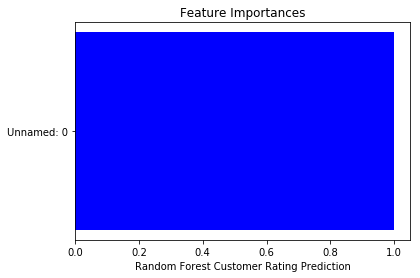

In [103]:
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Random Forest Customer Rating Prediction')